
# 1.Problem Definition
We have to find whether the person is in danger of sinking or not.So,it is a binary classification problem.

# 2.Data
We get the data from kaggle.
https://www.kaggle.com/c/titanic/data

# 3.Evaluation
The evaluation metric is accuracy.We will tune it till the accuracy is more than 98 percent.

# 4.Features 

* Variable	Definition	Key
* survival	Survival	0 = No, 1 = Yes
* pclass	 Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* 	     Sex	
* Age  	Age in years	
* sibsp	# of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	Ticket number	
*  fare	Passenger fare	
* cabin	Cabin number	
* embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

See the link as well:
https://www.kaggle.com/c/titanic/data


## Get the tools ready

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

# Getting our data ready

In [49]:
### Import the data
train=pd.read_csv("Titanic/train.csv")

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


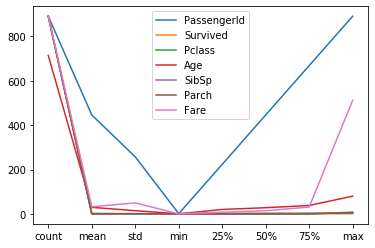

In [5]:
train.describe().plot()

In [6]:
pd.crosstab(train["Survived"],train["Sex"])

Sex,female,male
Survived,,
0,81,468
1,233,109


In [17]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [10]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


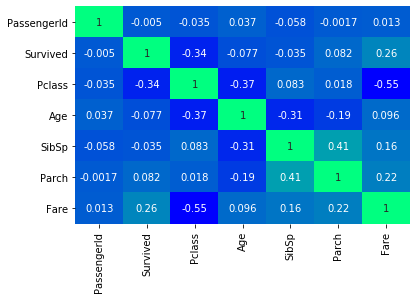

In [9]:
import seaborn as sns
fig,ax=plt.subplots()
ax=sns.heatmap(train.corr(),
              annot=True,
              cbar=False,
              cmap="winter")

In [14]:
explore=train.copy()

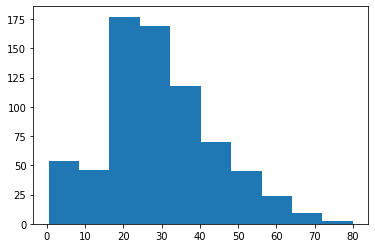

In [24]:
plt.hist(explore["Age"]);


In [15]:
explore

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
explore=pd.get_dummies(explore)
explore

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
887,888,1,1,19.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
888,889,0,3,NaN,1,2,23.4500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
889,890,1,1,26.0,0,0,30.0000,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [25]:
explore.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [34]:
explore["Age"].dropna(inplace=True)

In [35]:
explore

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## Getting our categorical columns ready

In [52]:
for label,content in train.items():
    if not pd.api.types.is_numeric_dtype(content):
        train[label+"_is_missing"]=pd.isnull(content)
        #if pd.isnull(content).sum():
        train[label]=content.astype("category").cat.as_ordered()
        train[label]=pd.Categorical(content).codes+1
            #train[label].fillna(content.median(),inplace=True)

In [53]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PassengerId             891 non-null    int64  
 1   Survived                891 non-null    int64  
 2   Pclass                  891 non-null    int64  
 3   Name                    891 non-null    int16  
 4   Sex                     891 non-null    int8   
 5   Age                     891 non-null    float64
 6   SibSp                   891 non-null    int64  
 7   Parch                   891 non-null    int64  
 8   Ticket                  891 non-null    int16  
 9   Fare                    891 non-null    float64
 10  Cabin                   891 non-null    int16  
 11  Embarked                891 non-null    int8   
 12  PassengerId_is_missing  891 non-null    bool   
 13  Survived_is_missing     891 non-null    bool   
 14  Pclass_is_missing       891 non-null    bo

In [55]:
train.sort_values(by=["Age"],inplace=True)

In [56]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_is_missing,Age_is_missing,SibSp_is_missing,Parch_is_missing,Fare_is_missing,Name_is_missing,Sex_is_missing,Ticket_is_missing,Cabin_is_missing,Embarked_is_missing
803,804,1,3,808,2,0.42,0,1,175,8.5167,...,False,False,False,False,False,False,False,False,True,False
755,756,1,2,322,2,0.67,1,1,167,14.5000,...,False,False,False,False,False,False,False,False,True,False
644,645,1,3,54,1,0.75,2,1,195,19.2583,...,False,False,False,False,False,False,False,False,True,False
469,470,1,3,55,1,0.75,2,1,195,19.2583,...,False,False,False,False,False,False,False,False,True,False
831,832,1,2,687,2,0.83,1,1,238,18.7500,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,117,0,3,179,2,70.50,0,0,461,7.7500,...,False,False,False,False,False,False,False,False,True,False
96,97,0,1,293,2,71.00,0,0,608,34.6542,...,False,False,False,False,False,False,False,False,False,False
493,494,0,1,40,2,71.00,0,0,604,49.5042,...,False,False,False,False,False,False,False,False,True,False
851,852,0,3,796,2,74.00,0,0,318,7.7750,...,False,False,False,False,False,False,False,False,True,False


In [39]:
train.isna().sum()

PassengerId                 0
Survived                    0
Pclass                      0
Name                        0
Sex                         0
Age                         0
SibSp                       0
Parch                       0
Ticket                      0
Fare                        0
Cabin                     687
Embarked                    2
PassengerId_is_missing      0
Survived_is_missing         0
Pclass_is_missing           0
Age_is_missing              0
SibSp_is_missing            0
Parch_is_missing            0
Fare_is_missing             0
dtype: int64

In [58]:
X,y=train.drop("Survived",axis=1),train["Survived"]

In [59]:
X.shape,y.shape

((891, 23), (891,))

In [60]:
from sklearn.model_selection import cross_val_score
results={}
def evaluate(X,y,models):
    for model_name,model in models.items():
        score=cross_val_score(model,X,y,cv=5,scoring="accuracy")
        results[model_name]=score
        
    return results

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import NearestNeighbors
models={"RandomForest":RandomForestClassifier(),
       "SVC":SVC(),
       "LinearSVC":LinearSVC()}

In [62]:
evaluate(X,y,models)

C:\Users\DELL\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\DELL\Desktop\sample_project_1\env\lib\site-packages\sklearn\svm\_base.p

{'RandomForest': array([0.50837989, 0.78651685, 0.71910112, 0.80898876, 0.78089888]),
 'SVC': array([0.68156425, 0.70786517, 0.65730337, 0.69662921, 0.6741573 ]),
 'LinearSVC': array([0.63128492, 0.64606742, 0.62359551, 0.45505618, 0.62921348])}

In [72]:
a=[0.50837989, 0.78651685, 0.71910112, 0.80898876, 0.78089888]


0.7207771000000001

In [48]:
model=RandomForestClassifier().fit(X_train,y_train)
model.score(X_valid,y_valid)

0.7877094972067039

In [91]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid=train_test_split(X,y,test_size=0.2)

In [188]:
model=RandomForestClassifier()

In [189]:
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
model.score(X_valid,y_valid)

0.8435754189944135

In [52]:
import pickle

In [53]:
pickle.dump(model,open("Titanic/titanic_classify.csv","wb"))

In [83]:
train.to_csv("House Data/train_processed.csv",index=False)


In [154]:
import pickle
pickle.dump(model,open("random_forest_3.pkl","wb"))

In [205]:

    np.random.seed(100)
    model=RandomForestClassifier(n_estimators=160,
                            
                            )
    model.fit(X,y,sample_weight=891)
    

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [207]:
model.score(X_train,y_train)

1.0

## Hyperparameter tuning

In [142]:
rg_rf.best_params_

{'n_estimators': 160,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto'}

In [192]:
evaluate()

0.8491620111731844

In [131]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [135]:
grid={"n_estimators":[160,100],
     "min_samples_split":[2,5,10],
     "max_features":["auto","sqrt"],
     "min_samples_leaf":[1,24]}
rg_rf=RandomizedSearchCV(RandomForestClassifier(n_jobs=-1,random_state=100,
                                               ),
                         cv=5,
                         param_distributions=grid,
                         n_iter=100,
                         verbose=True
                    )

In [137]:
rg_rf.fit(X_train,y_train)

C:\Users\DELL\Desktop\sample_project_1\env\lib\site-packages\sklearn\model_selection\_search.py:277: UserWarning: The total space of parameters 24 is smaller than n_iter=100. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   37.2s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

## Let's deal with test data

In [155]:
test=pd.read_csv("Titanic/test.csv")

In [156]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'PassengerId_is_missing', 'Survived_is_missing', 'Pclass_is_missing',
       'Age_is_missing', 'SibSp_is_missing', 'Parch_is_missing',
       'Fare_is_missing', 'Name_is_missing', 'Sex_is_missing',
       'Ticket_is_missing', 'Cabin_is_missing', 'Embarked_is_missing'],
      dtype='object')

In [157]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [59]:
set(train.columns)-set(test.columns)

{'Survived'}

In [60]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [61]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [161]:
for label,content in test.items():
    if pd.api.types.is_numeric_dtype(content):
        test[label+"_is_missing"]=pd.isnull(content)
        if pd.isnull(content).sum():
        #test[label]=content.astype("category").cat.as_ordered()
        #test[label]=pd.Categorical(content).codes+1
            test[label].fillna(content.median(),inplace=True)

In [162]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   PassengerId                     418 non-null    int64  
 1   Pclass                          418 non-null    int64  
 2   Name                            418 non-null    int16  
 3   Sex                             418 non-null    int8   
 4   Age                             418 non-null    float64
 5   SibSp                           418 non-null    int64  
 6   Parch                           418 non-null    int64  
 7   Ticket                          418 non-null    int16  
 8   Fare                            418 non-null    float64
 9   Cabin                           418 non-null    int8   
 10  Embarked                        418 non-null    int8   
 11  Name_is_missing                 418 non-null    bool   
 12  Sex_is_missing                  418 

In [171]:
b=list(set(test.columns)-set(X.columns))

In [172]:
b

[]

In [178]:
test["Survived_is_missing"]=False

In [180]:
test.to_csv("Titanic/test_processed.csv",index=False)

In [179]:
set(X.columns)-set(test.columns)

set()

In [170]:
for name in b:
    test.drop(name,axis=1,inplace=True)

In [163]:
test.isna().sum()

PassengerId                       0
Pclass                            0
Name                              0
Sex                               0
Age                               0
SibSp                             0
Parch                             0
Ticket                            0
Fare                              0
Cabin                             0
Embarked                          0
Name_is_missing                   0
Sex_is_missing                    0
Ticket_is_missing                 0
Cabin_is_missing                  0
Embarked_is_missing               0
PassengerId_is_missing            0
Pclass_is_missing                 0
Age_is_missing                    0
SibSp_is_missing                  0
Parch_is_missing                  0
Fare_is_missing                   0
Name_is_missing_is_missing        0
Sex_is_missing_is_missing         0
Ticket_is_missing_is_missing      0
Cabin_is_missing_is_missing       0
Embarked_is_missing_is_missing    0
dtype: int64

In [72]:
y_preds=model.predict(test)

In [73]:
y_preds

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [74]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [75]:
titanic_submit=pd.DataFrame(columns=["PassengerId","Survived"])

In [76]:
titanic_submit

,PassengerId,Survived


In [78]:
test["PassengerId"]

0       892
1       893
2       894
3       895
4       896
       ... 
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

In [79]:
titanic_submit["PassengerId"]=test["PassengerId"]
titanic_submit["Survived"]=y_preds

In [80]:
titanic_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [81]:
titanic_submit.to_csv("titankaggle.csv",index=False)

In [110]:
np.random.seed(100)
#model.fit(X_train,y_train)
model.score(X_valid,y_valid)

0.7653631284916201

In [108]:
from sklearn.model_selection import GridSearchCV
np.random.seed(100)
rf_grid={"n_estimators":[210],
        "max_depth":[None,3,5,10],
        "min_samples_split":[2,10],
        "min_samples_leaf":[1,20,2]}
model=GridSearchCV(RandomForestClassifier(n_jobs=-1),
                  param_grid=rf_grid,
                  cv=5,
                  verbose=True)

In [95]:
def eval():
    model.fit(X_train,y_train)
    model.score(X_valid,y_valid)

In [99]:
model.best_params_

{'min_samples_leaf': 50, 'n_estimators': 60}

In [101]:
from sklearn.linear_model import LogisticRegression


In [102]:
log=LogisticRegression()
log.fit(X_train,y_train)
log.score(X_valid,y_valid)

C:\Users\DELL\Desktop\sample_project_1\env\lib\site-packages\sklearn\linear_model\_logistic.py:938: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.6871508379888268

In [111]:
new_y_preds=model.predict(test)

In [114]:
titanic_submit["Survived"]=new_y_preds

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [115]:
titanic_submit["Survived"]=new_y_preds

In [116]:
titanic_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [122]:
titanic_submit.drop("Survived",axis=1,inplace=True)

In [124]:
titanic_submit

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [119]:
titanic_submit["Survived"]=new_y_preds

In [120]:
titanic_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [121]:
model.fit(X,y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  1.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [125]:
new_preds=model.predict(test)

In [126]:
titanic_submit["Survived"]=new_preds

In [127]:
titanic_submit

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [129]:
titanic_submit.to_csv("titanic_Submit_2.csv",index=False)

## Making final predictions

In [208]:
y_preds_new=model.predict(test)

In [209]:
submit_3=pd.DataFrame(columns=["PassengerId","Survived"])

In [210]:
submit_3

,PassengerId,Survived


In [213]:
submit_3["PassengerId"],submit_3["Survived"]=test["PassengerId"],y_preds_new

In [214]:
submit_3

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [215]:
submit_3.to_csv("Titanic/submit_5.csv",index=False)